Создание расширенных фильтров массивов с помощью статистических показателей, а также математических и логических операций
В этом разделе вы познакомитесь с простейшим алгоритмом обнаружения аномальных значений: наблюдаемое значение считается аномальным (outlier), если отличается от среднего более чем на стандартное отклонение. Мы пройдемся по примеру анализа данных сайта в целях определения количества его активных пользователей, показателя отказов и средней длительности сеанса в секундах. (Показатель отказов (bounce rate) — это процент посетителей, которые уходят с сайта сразу же после посещения одной страницы. Высокий показатель отказов — плохой сигнал, означающий, что сайт, возможно, неинтересен или бесполезен.) Мы рассмотрим данные и выявим аномальные значения.

Математическое ожидание, обозначаемое символом μ, представляет собой среднее значение по всем значениям последовательности. Стандартное отклонение, обозначаемое символом σ, представляет собой меру отклонения набора данных от среднего значения. По определению, в случае истинно нормального распределения данных 68,2 % всех точек данных попадает в интервал стандартного отклонения [ω1 = μ – σ, ω2 = μ + σ]. Из этого следует определение аномальных значений: любое значение, не попадающее в упомянутый интервал, — аномальное

В этом примере мы сгенерировали данные из нормального распределения с μ = 10 и σ = 1, в результате чего получается интервал ω1 = μ – 1 = 9 и ω2 = μ + 1 = 11. В дальнейшем мы просто предполагаем, что любое наблюдаемое значение, выходящее за пределы интервала, определяемого стандартным отклонением от математического ожидания, — аномальное. Применительно к нашим данным это означает, что любое значение, выходящее за рамки интервала [9, 11] — аномальное.
Простой код, с помощью которого я сгенерировал данный график

[ 9.55372857  9.66460923  9.70833891 10.82031497 10.12759216  8.18427927
  9.01615931 11.12728069  9.53358455  8.663735   10.47545676 10.6989943
 11.40492818 10.03174612 10.10104737  9.41556601  9.82161039  8.31969124
  9.7704626   9.94800178  9.31970105  8.70408422 10.9441553   9.29609944
 10.55435959 10.85550503 10.23748597 10.31209597 10.39568013 10.75378672
 10.52571846 10.03032493  8.90041643  8.61910342 10.42998735 11.34312488
  9.33458852 10.90583477  9.01341663 10.20854817 10.20936022 11.75083855
  9.24588566  9.53235095 10.24647111  9.02130422  9.5864078  10.72990352
  9.63572712 10.41731662  9.80822978 10.37955729  9.87421037 10.09287143
  9.85152259 11.10250215  9.67993049 11.4879087  10.59814716  8.89856346
  9.71306407 11.21043414 10.22776881  9.06808424 10.45219106 10.49420545
  8.5955335   9.36490497  9.97047002 10.44793315 10.17393349 11.00264522
  8.06488551  9.94670468 10.45001802 10.36057527  9.85290834 11.3619175
  9.71387699  8.35148345  9.51269877  9.83443167  9.0

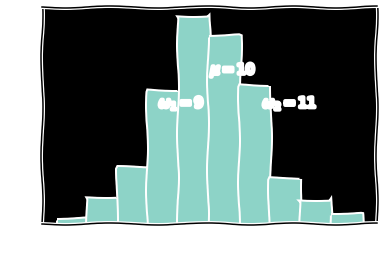

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

seq = np.random.normal(10.0, 1.0, 500)
print(seq)

plt.xkcd() # используем тему
plt.hist(seq) # создаем гистограму сета
plt.annotate(r"$\omega_1=9$", (9, 70)) # задаем значение для омега
plt.annotate(r"$\omega_2=11$", (11, 70)) # аналогично для омега2
plt.annotate(r"$\mu=10$", (10, 90)) # для мю 
plt.savefig("plot.jpg") #сохраняем 
plt.show() # смотрим шоу

NumPy normal(математическое_ожидание, отклонение, форма)

Прежде чем заняться исследованием нашего проекта, вкратце рассмотрим два оставшихся навыка, которые нам понадобятся, чтобы довести до конца решение нашей задачи.
Поиск абсолютного значения
Во-вторых, нам придется преобразовывать отрицательные значения в положительные, чтобы проверить, отклоняется ли потенциальное аномальное значение от среднего более чем на стандартное отклонение. Нам важен только модуль отклонения, а не его знак. Это и называется абсолютным значением

In [1]:
import numpy as np
a = np.array([1, -1, 2, -2])

print(a)

print(np.abs(a)) # abs = модуль

[ 1 -1  2 -2]
[1 1 2 2]


В-третьих, следующая функция NumPy производит поэлементную операцию логического И, объединяя два булевых массива a и b и возвращая массив, значения в котором представляют собой комбинацию отдельных булевых значений из тех массивов с помощью операции логического И

In [2]:
a = np.array([True, True, True, False])
b = np.array([False, True, True, False])

print(np.logical_and(a, b))

[False  True  True False]


Мы сочетаем элемент массива a с индексом i и элемент массива b с таким же индексом, обратившись к операции np.logical_and(a, b). Результат представляет собой массив булевых значений, равных True, если оба операнда a[i] и b[i] равны True, и False в противном случае. Это позволяет схлопывать несколько булевых массивов в один с помощью стандартных логических операций. Один из удобных сценариев применения этого — объединение массивов булевых фильтров, подобно тому, как это было сделано в предыдущем однострочнике.
Обратите внимание: можно умножить и два булева массива a и b, что также эквивалентно логической операции np.logical_and(a, b). Дело в том, что Python представляет значение True как целочисленное значение 1 (или даже любое отличное от 0 целочисленное значение), а значение False — как целочисленное значение 0. Если умножить что-либо на 0, то получится 0, то есть False. Это значит, что True (целочисленное значение ≠ 0) получится только тогда, когда все операнды равны True.
С этими знаниями вы теперь полностью готовы понять следующий однострочный фрагмент кода.

Следующий kod находит все аномальные дни, для которых статистические показатели отличаются более чем на стандартное отклонение от среднего значения.

In [4]:
## Данные анализа сайта
## (строка = день), (столбцы = пользователи, отказы, длительность)
a = np.array([[815, 70, 115],
[767, 80, 50],
[912, 74, 77],
[554, 88, 70],
[1008, 65, 128]])

mean, stdev = np.mean(a, axis = 0), np.std(a, axis = 0)
print( mean, stdev)

[811.2  75.4  88. ] [152.97764543   7.98999374  29.04479299]


In [6]:
#logic
outliers = ((np.abs(a[:,0] - mean[0]) > stdev[0])
            * (np.abs(a[:,1] - mean[1]) > stdev[1])
            * (np.abs(a[:, 2] - mean[2]) > stdev[2]))
print(a[outliers])

[[1008   65  128]]


создаем список из модулей(для вычисления) отнимаем отклонение, и выявлям больше ли чем среднее погрешность, делаем это для трех столбцов, используя * т.к на выходе будет 3 таблицы булевых значений, и значит их можно "сбулить", тогда используем созданную функцию к нашему датасету, получаем день в котором все аномальное(только если все аномальное)

Принцип работы
Набор данных состоит из строк, соответствующих различным дням, и трех столбцов, отражающих количество активных пользователей за день, показатель отказов и среднюю длительность сеанса в секундах соответственно.
Для каждого столбца мы вычисляем среднее значение и стандартное отклонение. Например, среднее значение столбца «Активных пользователей за день» равно 811,2, а его стандартное отклонение равно 152,97. Обратите внимание, что аргумент axis используется аналогично изложенному в разделе «Очистка каждого i-го элемента массива с помощью транслирования, присваивания срезу и изменения формы».
Наша задача — выявить аномальные по всем трем столбцам сайты. Что касается столбца «Активных пользователей за день», то любое наблюдаемое значение меньше 811,2 – 152,97 = 658,23 или больше 811,2 + 152,23 = 963,43 считается аномальным.
Однако целый день мы считаем аномальным только в том случае, если значения во всех трех наблюдаемых столбцах являются аномальными. Для этого мы объединяем три булевых массива с помощью оператора логического И. Результат представляет собой единственную строку, в которой все три столбца — аномальные значения:
[[1008 65 128]]
Резюмируя: вы научились использовать оператор логического И библиотеки NumPy в целях простейшего обнаружения аномальных значений с помощью простых статических средств из библиотеки NumPy.